### Projekt zaliczeniowy
#### Autorzy: Igor Juraszek, Paulina Cwieląg

Do analizy użyliśmy bazy danych ```world_population.csv``` , króta zawierała określone dane dla poszczególnych krajów:
* kod kraju
* nazwę kraju
* stolicę
* kontynent
* populację kraju w latach:
   * 2022
   * 2020
   * 2015
   * 2010
   * 2000
   * 1990
   * 1980
   * 1970
* powierzchnię
* zagęszczenie
* wskaźnik przyrostu
* część populacji całego świata

Projekt zawiera:
* tabele
* tabele przestawne
* wykresy
* heatmapę
* test Shapiro-Wilka

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from scipy.stats import mannwhitneyu
from scipy.stats import ttest_ind
import seaborn as sns

data = pd.read_csv('world_population.csv')
data

,Rank,CCA3,Country,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
0,36,AFG,Afghanistan,Kabul,Asia,41128771,38972230,33753499,28189672,19542982,10694796,12486631,10752971,652230,63.0587,1.0257,0.52
1,138,ALB,Albania,Tirana,Europe,2842321,2866849,2882481,2913399,3182021,3295066,2941651,2324731,28748,98.8702,0.9957,0.04
2,34,DZA,Algeria,Algiers,Africa,44903225,43451666,39543154,35856344,30774621,25518074,18739378,13795915,2381741,18.8531,1.0164,0.56
3,213,ASM,American Samoa,Pago Pago,Oceania,44273,46189,51368,54849,58230,47818,32886,27075,199,222.4774,0.9831,0.00
4,203,AND,Andorra,Andorra la Vella,Europe,79824,77700,71746,71519,66097,53569,35611,19860,468,170.5641,1.0100,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229,226,WLF,Wallis and Futuna,Mata-Utu,Oceania,11572,11655,12182,13142,14723,13454,11315,9377,142,81.4930,0.9953,0.00
230,172,ESH,Western Sahara,El Aaiún,Africa,575986,556048,491824,413296,270375,178529,116775,76371,266000,2.1654,1.0184,0.01
231,46,YEM,Yemen,Sanaa,Asia,33696614,32284046,28516545,24743946,18628700,13375121,9204938,6843607,527968,63.8232,1.0217,0.42
232,63,ZMB,Zambia,Lusaka,Africa,20017675,18927715,16248230,13792086,9891136,7686401,5720438,4281671,752612,26.5976,1.0280,0.25


In [2]:
data.describe()

,Rank,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
count,234.000000,2.340000e+02,2.340000e+02,2.340000e+02,2.340000e+02,2.340000e+02,2.340000e+02,2.340000e+02,2.340000e+02,2.340000e+02,234.000000,234.000000,234.000000
mean,117.500000,3.407441e+07,3.350107e+07,3.172996e+07,2.984524e+07,2.626947e+07,2.271022e+07,1.898462e+07,1.578691e+07,5.814494e+05,452.127044,1.009577,0.427051
std,67.694165,1.367664e+08,1.355899e+08,1.304050e+08,1.242185e+08,1.116982e+08,9.783217e+07,8.178519e+07,6.779509e+07,1.761841e+06,2066.121904,0.013385,1.714977
min,1.000000,5.100000e+02,5.200000e+02,5.640000e+02,5.960000e+02,6.510000e+02,7.000000e+02,7.330000e+02,7.520000e+02,1.000000e+00,0.026100,0.912000,0.000000
25%,59.250000,4.197385e+05,4.152845e+05,4.046760e+05,3.931490e+05,3.272420e+05,2.641158e+05,2.296142e+05,1.559970e+05,2.650000e+03,38.417875,1.001775,0.010000
50%,117.500000,5.559944e+06,5.493074e+06,5.307400e+06,4.942770e+06,4.292907e+06,3.825410e+06,3.141146e+06,2.604830e+06,8.119950e+04,95.346750,1.007900,0.070000
75%,175.750000,2.247650e+07,2.144798e+07,1.973085e+07,1.915957e+07,1.576230e+07,1.186923e+07,9.826054e+06,8.817329e+06,4.304258e+05,238.933250,1.016950,0.280000
max,234.000000,1.425887e+09,1.424930e+09,1.393715e+09,1.348191e+09,1.264099e+09,1.153704e+09,9.823725e+08,8.225344e+08,1.709824e+07,23172.266700,1.069100,17.880000


In [3]:
print('5 krajów największych pod względem populacji (2022) - cały świat')
data[['Country', 'Area (km²)']].sort_values(by='Area (km²)', ascending=False).head(5)

5 krajów największych pod względem populacji (2022) - cały świat


,Country,Area (km²)
171,Russia,17098242
35,Canada,9984670
41,China,9706961
221,United States,9372610
27,Brazil,8515767


In [4]:
population_by_year = data.iloc[:,2:11].groupby(by='Continent').sum()
population_by_year

,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population
Continent,,,,,,
Africa,1426730932,1360671810,1201102442,1055228072,818946032,638150629
Asia,4721383274,4663086535,4458250182,4220041327,3735089604,3210563577
Europe,743147538,745792196,741535608,735613934,726093423,720320797
North America,600296136,594236593,570383850,542720651,486069584,421266425
Oceania,45038554,43933426,40403283,37102764,31222778,26743822
South America,436816608,431530043,413134396,393078250,349634282,297146415


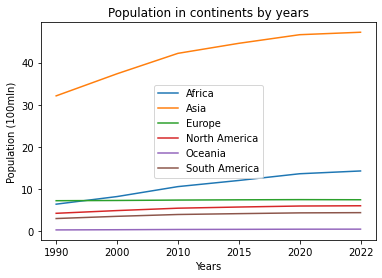

In [5]:
population_by_year = data.iloc[:,2:11].groupby(by='Continent').sum()

years = [year[0:4] for year in population_by_year.columns][::-1]

for index in range(len(population_by_year)):
    row = population_by_year.iloc[index]
    row_label = row.name
    row_data = [el / 100000000 for el in row][::-1]
    plt.plot(years, row_data, label=row_label)
    
plt.xlabel('Years')
plt.ylabel('Population (100mln)')
plt.title('Population in continents by years')

plt.legend()
plt.show()

In [6]:
shapiro = stats.shapiro(population_by_year)
shapiro

ShapiroResult(statistic=0.6858206391334534, pvalue=1.7063386792415258e-07)

In [7]:
print('5 krajów największych pod względem powierzchni - cały świat')
data[['Country', '2022 Population']].sort_values(by='2022 Population', ascending=False).head(5)

5 krajów największych pod względem powierzchni - cały świat


,Country,2022 Population
41,China,1425887337
92,India,1417173173
221,United States,338289857
93,Indonesia,275501339
156,Pakistan,235824862


In [8]:
print('Powierzchnia poszczególnych kontynentów')
data[['Continent', 'Area (km²)']].groupby(by='Continent').sum()

Powierzchnia poszczególnych kontynentów


,Area (km²)
Continent,
Africa,30317963
Asia,32138141
Europe,23010411
North America,24244178
Oceania,8515081
South America,17833382


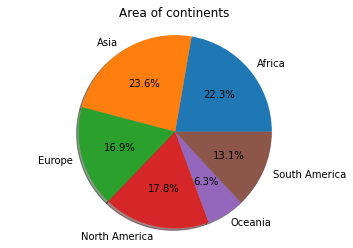

In [9]:
continents_by_area = data[['Continent', 'Area (km²)']].groupby(by='Continent').sum()
plt.pie(continents_by_area["Area (km²)"], labels=continents_by_area.index,  shadow=True, autopct='%.1f%%')
plt.title('Area of continents')
plt.axis('equal')
plt.show()

In [10]:
print('Populacja na poszczególnych kontynentach')
data[['Continent', '2022 Population']].groupby(by='Continent').sum()

Populacja na poszczególnych kontynentach


,2022 Population
Continent,
Africa,1426730932
Asia,4721383274
Europe,743147538
North America,600296136
Oceania,45038554
South America,436816608


In [11]:
print('5 krajów największych pod względem populacji (2022) - Azja')
biggest_countries_in_asia_by_population = data[['Country', 'Continent','2022 Population']]
biggest_countries_in_asia_by_population.loc[biggest_countries_in_asia_by_population['Continent'] == 'Asia'].sort_values(by=['2022 Population'], ascending=False).head(5)

5 krajów największych pod względem populacji (2022) - Azja


,Country,Continent,2022 Population
41,China,Asia,1425887337
92,India,Asia,1417173173
93,Indonesia,Asia,275501339
156,Pakistan,Asia,235824862
16,Bangladesh,Asia,171186372


In [12]:
print('5 krajów największych pod względem powierzchni - Azja')
biggest_countries_in_asia_by_area = data[['Country', 'Continent', 'Area (km²)']]
biggest_countries_in_asia_by_area.loc[biggest_countries_in_asia_by_area['Continent'] == 'Asia'].sort_values(by=['Area (km²)'], ascending=False).head(5)

5 krajów największych pod względem powierzchni - Azja


,Country,Continent,Area (km²)
41,China,Asia,9706961
92,India,Asia,3287590
105,Kazakhstan,Asia,2724900
182,Saudi Arabia,Asia,2149690
93,Indonesia,Asia,1904569


In [13]:
print('5 krajów największych pod względem populacji (2022) - Afryka')
biggest_countries_in_africa_by_population = data[['Country', 'Continent','2022 Population']]
biggest_countries_in_africa_by_population.loc[biggest_countries_in_africa_by_population['Continent'] == 'Africa'].sort_values(by=['2022 Population'], ascending=False).head(5)

5 krajów największych pod względem populacji (2022) - Afryka


,Country,Continent,2022 Population
149,Nigeria,Africa,218541212
63,Ethiopia,Africa,123379924
57,Egypt,Africa,110990103
55,DR Congo,Africa,99010212
205,Tanzania,Africa,65497748


In [14]:
print('5 krajów największych pod względem powierzchni - Afryka')
biggest_countries_in_africa_by_area = data[['Country', 'Continent', 'Area (km²)']]
biggest_countries_in_africa_by_area.loc[biggest_countries_in_africa_by_area['Continent'] == 'Africa'].sort_values(by=['Area (km²)'], ascending=False).head(5)

5 krajów największych pod względem powierzchni - Afryka


,Country,Continent,Area (km²)
2,Algeria,Africa,2381741
55,DR Congo,Africa,2344858
198,Sudan,Africa,1886068
115,Libya,Africa,1759540
39,Chad,Africa,1284000


In [15]:
print('5 krajów największych pod względem populacji (2022) - Europa')
biggest_countries_in_europe_by_population = data[['Country', 'Continent','2022 Population']]
biggest_countries_in_europe_by_population.loc[biggest_countries_in_europe_by_population['Continent'] == 'Europe'].sort_values(by=['2022 Population'], ascending=False).head(5)

5 krajów największych pod względem populacji (2022) - Europa


,Country,Continent,2022 Population
171,Russia,Europe,144713314
74,Germany,Europe,83369843
220,United Kingdom,Europe,67508936
68,France,Europe,64626628
99,Italy,Europe,59037474


In [16]:
print('5 krajów największych pod względem powierzchni - Europa')
biggest_countries_in_europe_by_area = data[['Country', 'Continent', 'Area (km²)']]
biggest_countries_in_europe_by_area.loc[biggest_countries_in_europe_by_area['Continent'] == 'Europe'].sort_values(by=['Area (km²)'], ascending=False).head(5)

5 krajów największych pod względem powierzchni - Europa


,Country,Continent,Area (km²)
171,Russia,Europe,17098242
218,Ukraine,Europe,603500
68,France,Europe,551695
196,Spain,Europe,505992
200,Sweden,Europe,450295


In [17]:
print('5 krajów największych pod względem populacji (2022) - Ameryka Północna')
biggest_countries_in_north_america_by_population = data[['Country', 'Continent','2022 Population']]
biggest_countries_in_north_america_by_population.loc[biggest_countries_in_north_america_by_population['Continent'] == 'North America'].sort_values(by=['2022 Population'], ascending=False).head(5)

5 krajów największych pod względem populacji (2022) - Ameryka Północna


,Country,Continent,2022 Population
221,United States,North America,338289857
131,Mexico,North America,127504125
35,Canada,North America,38454327
82,Guatemala,North America,17843908
87,Haiti,North America,11584996


In [18]:
print('5 krajów największych pod względem powierzchni - Ameryka Północna')
biggest_countries_in_north_america_by_area = data[['Country', 'Continent', 'Area (km²)']]
biggest_countries_in_north_america_by_area.loc[biggest_countries_in_north_america_by_area['Continent'] == 'North America'].sort_values(by=['Area (km²)'], ascending=False).head(5)

5 krajów największych pod względem powierzchni - Ameryka Północna


,Country,Continent,Area (km²)
35,Canada,North America,9984670
221,United States,North America,9372610
78,Greenland,North America,2166086
131,Mexico,North America,1964375
147,Nicaragua,North America,130373


In [19]:
print('5 krajów największych pod względem populacji (2022) - Oceania')
biggest_countries_in_oceania_by_population = data[['Country', 'Continent','2022 Population']]
biggest_countries_in_oceania_by_population.loc[biggest_countries_in_oceania_by_population['Continent'] == 'Oceania'].sort_values(by=['2022 Population'], ascending=False).head(5)

5 krajów największych pod względem populacji (2022) - Oceania


,Country,Continent,2022 Population
11,Australia,Oceania,26177413
160,Papua New Guinea,Oceania,10142619
146,New Zealand,Oceania,5185288
66,Fiji,Oceania,929766
191,Solomon Islands,Oceania,724273


In [20]:
print('5 krajów największych pod względem powierzchni - Oceania')
biggest_countries_in_oceania_by_area = data[['Country', 'Continent', 'Area (km²)']]
biggest_countries_in_oceania_by_area.loc[biggest_countries_in_oceania_by_area['Continent'] == 'Oceania'].sort_values(by=['Area (km²)'], ascending=False).head(5)

5 krajów największych pod względem powierzchni - Oceania


,Country,Continent,Area (km²)
11,Australia,Oceania,7692024
160,Papua New Guinea,Oceania,462840
146,New Zealand,Oceania,270467
191,Solomon Islands,Oceania,28896
145,New Caledonia,Oceania,18575


In [21]:
print('5 krajów największych pod względem populacji (2022) - Ameryka Południowa')
biggest_countries_in_oceania_by_population = data[['Country', 'Continent','2022 Population']]
biggest_countries_in_oceania_by_population.loc[biggest_countries_in_oceania_by_population['Continent'] == 'South America'].sort_values(by=['2022 Population'], ascending=False).head(5)

5 krajów największych pod względem populacji (2022) - Ameryka Południowa


,Country,Continent,2022 Population
27,Brazil,South America,215313498
42,Colombia,South America,51874024
8,Argentina,South America,45510318
162,Peru,South America,34049588
227,Venezuela,South America,28301696


In [22]:
print('5 krajów największych pod względem powierzchni - Ameryka Południowa')
biggest_countries_in_south_america_by_area = data[['Country', 'Continent', 'Area (km²)']]
biggest_countries_in_south_america_by_area.loc[biggest_countries_in_south_america_by_area['Continent'] == 'South America'].sort_values(by=['Area (km²)'], ascending=False).head(5)

5 krajów największych pod względem powierzchni - Ameryka Południowa


,Country,Continent,Area (km²)
27,Brazil,South America,8515767
8,Argentina,South America,2780400
162,Peru,South America,1285216
42,Colombia,South America,1141748
24,Bolivia,South America,1098581


In [23]:
print('Kraje i ich zagęszczenie')
data[['Country', 'Density (per km²)']].sort_values(by='Density (per km²)', ascending=False)

Kraje i ich zagęszczenie


,Country,Density (per km²)
119,Macau,23172.2667
134,Monaco,18234.5000
187,Singapore,8416.4634
89,Hong Kong,6783.3922
76,Gibraltar,5441.5000
...,...,...
141,Namibia,3.1092
135,Mongolia,2.1727
230,Western Sahara,2.1654
64,Falkland Islands,0.3105


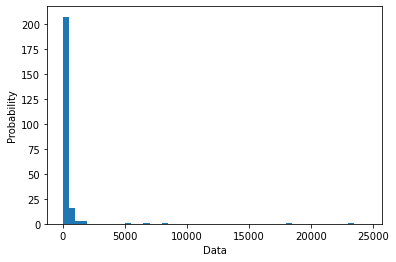

In [24]:
x = data[['Country', 'Density (per km²)']].sort_values(by='Density (per km²)', ascending=False)
bins = np.arange(0, 25000, 500)
plt.hist(x['Density (per km²)'], bins=bins, density=False) 
plt.ylabel('Probability')
plt.xlabel('Data');

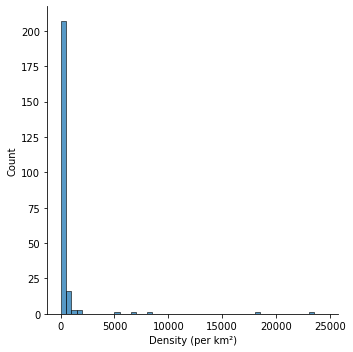

In [25]:
bins = np.arange(0, 25000, 500)
sns.displot(x['Density (per km²)'], bins=bins)

In [26]:
print('Wskaźnik przyrostu')
data[['Country', 'Growth Rate']].sort_values(by='Growth Rate', ascending=False)

Wskaźnik przyrostu


,Country,Growth Rate
133,Moldova,1.0691
164,Poland,1.0404
148,Niger,1.0378
202,Syria,1.0376
189,Slovakia,1.0359
...,...,...
117,Lithuania,0.9869
30,Bulgaria,0.9849
3,American Samoa,0.9831
112,Lebanon,0.9816


<AxesSubplot:>

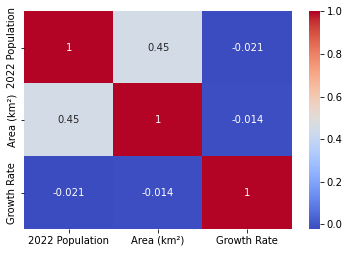

In [27]:
population_in_years = data[[
'2022 Population',
"Area (km²)",
'Growth Rate',]]
sns.heatmap(population_in_years.corr(), annot=True, cmap="coolwarm")

<AxesSubplot:xlabel='Growth Rate', ylabel='Continent'>

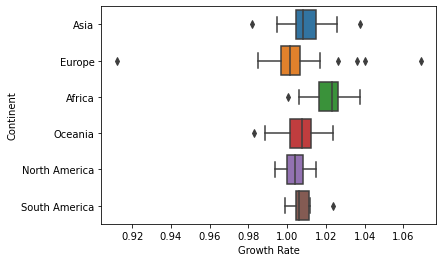

In [28]:
growth_rate_by_continent = data[['Continent', 'Growth Rate']]
sns.boxplot(y=growth_rate_by_continent['Continent'], x=growth_rate_by_continent['Growth Rate'])

In [29]:
print('Populacja i pole powierzchni dla poszczególnych kontynentów')
population_and_area_by_continent = data[['Continent','2022 Population', 'Area (km²)']].groupby(by='Continent').sum()
population_and_area_by_continent.pivot

Populacja i pole powierzchni dla poszczególnych kontynentów


<bound method DataFrame.pivot of                2022 Population  Area (km²)
Continent                                 
Africa              1426730932    30317963
Asia                4721383274    32138141
Europe               743147538    23010411
North America        600296136    24244178
Oceania               45038554     8515081
South America        436816608    17833382>

In [30]:
pd.pivot_table(population_and_area_by_continent, values=['Area (km²)', '2022 Population'], columns='Continent')

Continent,Africa,Asia,Europe,North America,Oceania,South America
2022 Population,1426730932,4721383274,743147538,600296136,45038554,436816608
Area (km²),30317963,32138141,23010411,24244178,8515081,17833382


Wnioski z obserwacji:
* Na przestrzeni lat populacja ludzi na całym świecie znacząco wzrosła.
* Największy przyrost ludności odnotowany został w Azji